<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_%EA%B0%84%EB%8B%A8%ED%95%9C_%EC%9D%B4%EC%A7%84_%ED%8A%B8%EB%A6%AC_%EB%B6%84%EB%A5%98%EA%B8%B0_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

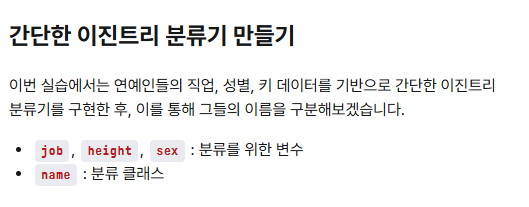

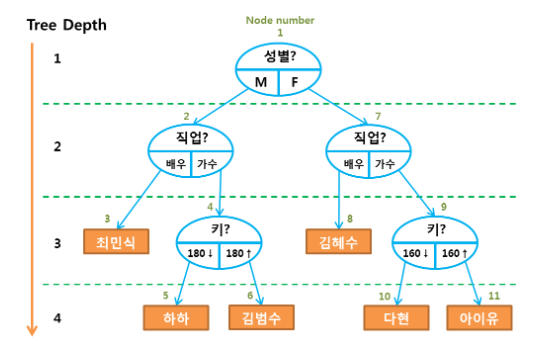

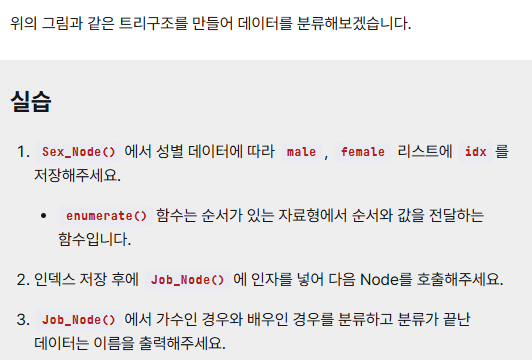

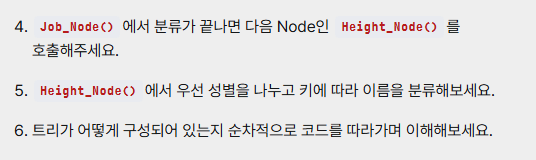

In [ ]:
import numpy as np
import pandas as pd


# 직업, 키, 성별로 이름을 구분하는 간단한 이진트리 분류기를 만들어보겠습니다.
name = ['하하', '김범수', '다현', '아이유', '최민식', '김혜수']
job  = ['가수', '가수'  , '가수', '가수'  , '배우'  , '배우']
height = [171, 182, 158, 160, 177, 170]
sex = ['M', 'M', 'F', 'F', 'M', 'F']

# Node 번호를 지정해주기 위한 변수
num = 0

# Node 정보를 저장하기 위한 딕셔너리 생성
node_list = {}

# 데이터 프레임 만들기
data = pd.DataFrame({'이름': name, '직업': job, '키': height,'성별': sex})
print(data,'\n')

"""
1. 성별에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Sex_Node(df, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    # Node num, Depth, Node Name 출력
    num +=1
    print('Node_num : {} | Node Depth : {} | Sex_Node'.format(num, depth))
    node_list[num] = 'Sex_Node'

    male = []
    female = []
    # 처음 성별 데이터 전체로 분류
    for idx, sex in enumerate(df['성별']):
        # 성별(sex)이 남자('M')인 경우 male에 Index 저장(append 사용)
        if sex=='M':
            male.append(idx)
        # 성별(sex)이 여자('F')인 경우 female에 Index 저장(append 사용)
        elif sex=='F':
            female.append(idx)

    # Index 확인
    print('남자 Index : ',male)
    print('여자 Index : ',female)

    # 성별 분류 후 직업을 분류하는 Node를 호출합니다.
    Job_Node(df, male, depth+1) # male
    Job_Node(df, female, depth+1) # female

"""
2. 직업에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Job_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1

    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Job_Node'.format(num, depth))
    node_list[num] = 'Job_Node'

    # Index 저장을 위한 리스트
    singer = []

    for i in idx:
        # 가수인 경우 singer에 Index 저장(append 사용)
        if df['직업'][i]=='가수':
            singer.append(i)

        # 배우인 경우 Node 번호와 해당 배우의 이름 출력
        else:
            num += 1
            print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1 ,data['이름'][i]))
            node_list[num] = data['이름'][i]

    # 가수인 경우 분류가 끝나지 않았으므로 Index 출력
    print('가수 Index : ',singer)

    # 마지막 분류 기준인 키를 통해 가수를 분류
    Height_Node(df, singer, depth+1)

"""
3. 키에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Height_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Height_Node'.format(num, depth))
    node_list[num] = 'Height_Node'

    for i in idx:
        num +=1
        # 성별에 따라 키의 기준이 다르기 때문에 성별을 우선 분류
        if df['성별'][i]=='M':
            # 남자의 경우 키에 따라 분류
            # 키가 180보다 작은 경우
            if df['키'][i]<180:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 180보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
        else:
            # 여자의 경우 키에 따라 분류
            # 키가 160보다 작은 경우
            if df['키'][i] < 160:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 160보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]

def main():
    # 첫 번째 분류 기준으로 성별을 설정합니다.
    Sex_Node(data, 1)
    print(node_list)

if __name__=="__main__":
    main()

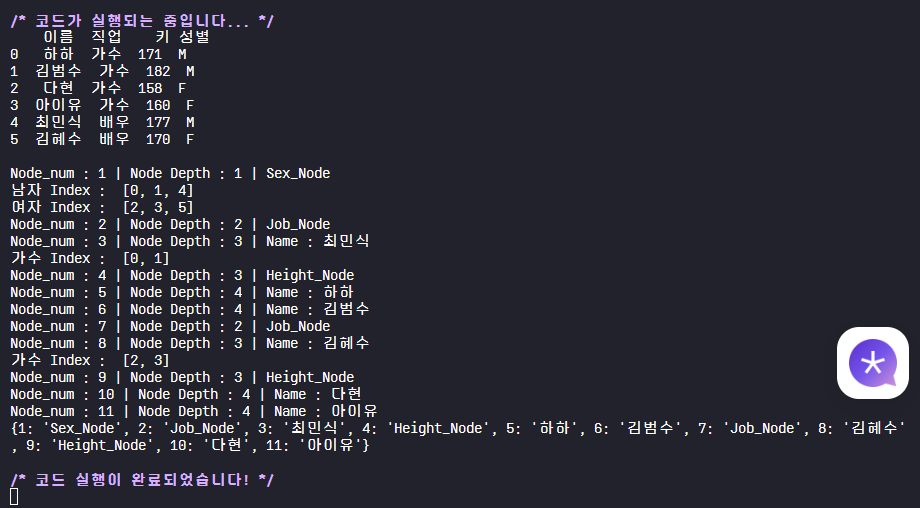